<a href="https://colab.research.google.com/github/sadrasa97/brain-cancer2020/blob/main/brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for root,dirs, files in os.walk('/content/drive/MyDrive/brain'):
    for filename in files:
        print(os.path.join(root, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/brain/no/no1444.jpg
/content/drive/MyDrive/brain/no/no1445.jpg
/content/drive/MyDrive/brain/no/no1446.jpg
/content/drive/MyDrive/brain/no/no1447.jpg
/content/drive/MyDrive/brain/no/no1448.jpg
/content/drive/MyDrive/brain/no/no1449.jpg
/content/drive/MyDrive/brain/no/no145.jpg
/content/drive/MyDrive/brain/no/no1450.jpg
/content/drive/MyDrive/brain/no/no1451.jpg
/content/drive/MyDrive/brain/no/no1452.jpg
/content/drive/MyDrive/brain/no/no1453.jpg
/content/drive/MyDrive/brain/no/no1454.jpg
/content/drive/MyDrive/brain/no/no1455.jpg
/content/drive/MyDrive/brain/no/no1456.jpg
/content/drive/MyDrive/brain/no/no1457.jpg
/content/drive/MyDrive/brain/no/no1458.jpg
/content/drive/MyDrive/brain/no/no1459.jpg
/content/drive/MyDrive/brain/no/no146.jpg
/content/drive/MyDrive/brain/no/no1460.jpg
/content/drive/MyDrive/brain/no/no1461.jpg
/content/drive/MyDrive/brain/no/no1462.jpg
/content/drive/MyDrive/brain/no/no1463.jpg
/content/drive/MyDrive/brain/no/no1464.jpg
/content/driv

In [20]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [21]:
# Get the path of files
image_directory='../content/drive/MyDrive/brain'

no_tumor_images=os.listdir(image_directory+ '/no')
yes_tumor_images=os.listdir(image_directory+ '/yes')
# initialize dataset and label arrays
dataset=[]
label=[]
# set input size
INPUT_SIZE=64

In [22]:
#loop over each image in each category
for i , image_name in enumerate(no_tumor_images):
    #read the image if its extension is .jpg
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'/no/'+image_name)
        image=Image.fromarray(image,'RGB')
        #resize the image
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        #append image arry in dataset list and its label in label list
        dataset.append(np.array(image))
        label.append(0)

        # same for yes images
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'/yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset=np.array(dataset)
label=np.array(label)

In [23]:
#print(dataset)
#print(label)
#print(len(label))

In [24]:
# Convert the dataset & label to numpy array 
dataset = np.array(dataset) 
label = np.array(label)

In [25]:
dataset

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [26]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train) 


[[[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]]


 [[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 

In [27]:
label

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
x_test

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [29]:
print(x_test.shape)
print(y_test.shape)

(600, 64, 64, 3)
(600,)


In [30]:
# Normalise the data for training purpose
x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

In [31]:
x_train

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [32]:
# Building a simple CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (INPUT_SIZE, INPUT_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 31, 31, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 128)      

In [33]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) Dense 1
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, 
batch_size = 16, 
verbose = 1, epochs = 18, 

shuffle = 'False')

Epoch 1/18
150/150 [==============================] - 36s 233ms/step - loss: 0.5396 - accuracy: 0.7250
Epoch 2/18
150/150 [==============================] - 33s 221ms/step - loss: 0.3866 - accuracy: 0.8354
Epoch 3/18
150/150 [==============================] - 34s 229ms/step - loss: 0.2460 - accuracy: 0.9038
Epoch 4/18
150/150 [==============================] - 33s 217ms/step - loss: 0.1600 - accuracy: 0.9388
Epoch 5/18
150/150 [==============================] - 35s 234ms/step - loss: 0.0727 - accuracy: 0.9750
Epoch 6/18
150/150 [==============================] - 33s 221ms/step - loss: 0.0409 - accuracy: 0.9896
Epoch 7/18
150/150 [==============================] - 33s 217ms/step - loss: 0.0205 - accuracy: 0.9950
Epoch 8/18
150/150 [==============================] - 34s 230ms/step - loss: 0.0242 - accuracy: 0.9904
Epoch 9/18
150/150 [==============================] - 33s 218ms/step - loss: 0.0131 - accuracy: 0.9962
Epoch 10/18
150/150 [==============================] - 36s 240ms/step - l

In [35]:
model.save('Brain Tumor detection.h5')

19/19 [==============================] - 2s 100ms/step


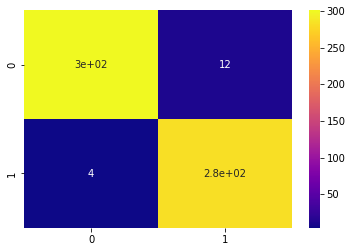

In [37]:
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, np.argmax(model.predict(x_test),axis=1))
sns.heatmap(cm,annot = True, cmap="plasma")

In [39]:
model = SVC()
model.fit(x_train.reshape(x_train.shape[0],-1), y_train)

y_pred = model.predict(x_test.reshape(x_test.shape[0],-1))

In [ ]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm,annot = True, cmap="plasma")